# Hand In 3 - Frequent patterns

Welcome to the handin on frequent patterns. 
This handin corresponds to the topics in Week 16--19 in the course.

The handin IS 
* done in groups of two people
* worth 10% of the grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Blackboard no later than **May 22nd kl. 23.59**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is **80**. For the maximum grade you need to get at least _65 points_. The minimum grade (02 in the Danish scale)
requires **at least** 24 points, with at least 8 points on of the first three Parts (Part 1,2,3).
Good luck!

**The exercise types**: There are three different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-2 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Describe\]**</span> means to provide a potentially longer answer of 1-5 lines indicating the analysis of the data and the results. 
4. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
5. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). However, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient! 

In [5]:
import itertools
from itertools import combinations

import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

import tabulate
from tqdm import tqdm

import sys
sys.path.append('../utilities')


import utilities

# from load_data import load_dblp_citations

# Part 1: Subgraph mining (25 Points)
In this part, we will work with subgraph mining algorithms. We will first solve some theory exercises and then implement two simple algorithms. 

## Task 1.1 DFS codes (13 Points)

### Task 1.1.1 (6 Points)
<span style='color: green'>**\[Compute by hand\]**</span> Find the canonical (i.e., minimal) DFS code for the graph below. Try to eliminate some codes without generating the complete search tree. *Hint*: you can eliminate a code if you can show that it will have a larger code than some other code (e.g., using label ordering, degree). 

<div>
<img src="images/dfs-codes.png" width="300">
</div>

*******************
1: A A A A B B C C D yes


2: A A A A B B D C C



(0,1,A,a,A)<br>
(1,2,A,a,A)<br>
(2,3,A,a,A)<br>
(3,4,A,a,B)<br>
(4,5,B,a,B)<br>
(5,1,B,a,A) backwards edge<br> 
(5,2,B,a,A) backwards edge<br>
(3,6,A,a,C)<br>
(6,7,C,a,C)<br>
(7,2,C,a,A) backwards edge<br>
(6,8,C,a,D)<br>
(8,1,D,a,A) backwards edge<br>
(8,2,D,a,A) backwards edge<br>
(8,3,D,a,A) backwards edge<br>

******************

### Task 1.1.2 (4 Points)
<span style='color: green'>**\[Describe\]**</span> an extension to the DFS-code notation and the rules for the lexicographic ordering that handles the case of *directed* graphs. If that is not possible, state why.

*******************
One possibility is to extend the codes with an indicator variable $d((i,j))$, that denotes if an edge is a forward edge or a backward edge. That means if the edge $(i,j)$ is a forward edge, $d((i,j)) = F$ otherwise if $(i,j)$ is a backwards edge, $d((i,j)) = F$.

So now the DFS codes will be on the form $$(i, j, l(i), l((i,j)), l(j), d((i,j)))$$

Futhermore we need to make another modification to have a lexicographic ordering of subgraphs in a directed graph with 3 rules:

1. A subgraph with a smaller DFS code comes before a subgraph with a larger DFS code.
2. If two subgraphs have the same DFS code, the one with fewer forward edges comes first.
3. If two subgraphs have the same DFS code and the same number of forward edges, the one with fewer backward edges comes first.


******************

### Task 1.1.3 (3 Points)
 <span style='color: green'>**\[Describe\]**</span> (no need for pseudocode) a suitable way to find the _maximum_ DFS-code from the rules for _minimum_ DFS-codes that you already know from the lecture.

*******************
We can quite easily find a maximum DFS-code from the rules of minimum DFS-codes. Since finding a minimum DFS-code corresponds to finding a canonical labeling of the graph in lexicographic order, if we reverse the lexicographic order, then we will find the maximum DFS-code.

******************

## Task 1.2 Maximum Independent Set (12 Points)

### Task 1.2.1 (6 Points)
<span style='color: green'>**\[Describe\]**</span>  Sketch a proof that the Maximum Independent Set (MIS) support is anti-monotone, i.e., the support of a pattern $P'$ is no larger than _any_ pattern $P$ included in $P'$ (that is, $P$ is a sub-pattern of $P'$). To guide you into the proof, start from a set of matchings of the pattern $P'$ which corresponds to an independent set of nodes $I'$ in the overlap graph $G'_{O}$, same for the set of nodes $I$ in the overlap graph $G_O$ of $P$. Observe (_Observation 1_) that the **all** the matchings $f'$ of $P'$ contain matchings $f$ of $P$. Also observe (_Observation 2_) that if you take two matchings $f_1'$ and $f_2'$ of $P'$ and the corresponding matchings $f_1$ and $f_2$ of $P$ overlap, so do the matchings $f_1'$ and $f_2'$. Given these two observation what can you deduce on the independent sets $I'$ of $G'_O$ and $I$ of $G_O$?

*******************
From the two observations, we can see that $\sigma_{MIS}(P) \geq \sigma_{MIS}(P')$. That is because from first observation, if all matches $f'$ of $P'$ also contains matchings $f$ of $P$. Also all the pairs of matches $f'_1$ and $f'_2$ of $P'$, that overlap, will also have the correspondong matches $f_1$ and $f_2$ of $P$ overlap. 

This does not hold the other way. So if there are a matching pair $f_1$ and $f_2$ of $P$, that does not overlap, the corresponding matches $f'_1$ and $f'_2$ can either overlap or not.

If it is the case, that there exists some $f'_1$ and $f'_2$ that does overlaps, but their corrsponding matches $f_1$ and $f_2$ does not overlap, we will have that $\sigma_{MIS}(P) > \sigma_{MIS}(P')$. If there does not exist any pair of matches, that does not overlap, we will have the case $\sigma_{MIS}(P) = \sigma_{MIS}
(P')$.

In the overlap graph, connected nodes, only counts for 1 and so if there are two independent nodes in $I', that is connected in $I$, there will be an inequality of the maximum indpendent sets of the two patterns.
******************

### Task 1.2.2 (6 Points)

<span style='color: green'>**\[Implement\]**</span> In this exercise, we will program a simplified version of the Maximum Indepent Set (MIS) support. Your exercise is to construct an algorithm that takes in input a pattern $P$ and the matches of the pattern in the graph $G$ and finds the Maximum Independent Set (MIS) support. Since finding the MIS is NP-hard your exercise is to implement a simple greedy approximation  algorithm. To test the code you can use the graph and code below. 

In [175]:
def mis_support(P, matches): 
    """
    Returns the MIS support of a pattern. 

    Parameters
    ----------
    P:       The pattern represented as a networkx undirected graph object
    matches: A list of subgraph isomorphic matches. Each match is a dictionary id_node_pattern -> id_node_graph
    """
    mis = 0
    ### YOUR CODE HERE
    # check if two matches are overlapping
    def is_overlapping(match1, match2):
        return len(list(set(match1.keys()).intersection(set(match2.keys())))) > 1 # 1 is the limit of nodes that can be shared between two matches
    
    # create overlap graph
    overlap_graph = nx.Graph()
    I = set([i for i in range(len(matches))])
    overlap_graph.add_nodes_from(I)

    # add edges to overlap graph
    for i in range(len(matches)):
        for j in range(i+1, len(matches)):
            # if two matches are overlapping, add an edge between them
            if is_overlapping(matches[i], matches[j]):
                overlap_graph.add_edge(i, j)

    # get cliques from a node in the overlap graph recursively
    def get_components(node, visited):
        if node in visited:
            return visited
        visited.add(node)
        for n in overlap_graph.neighbors(node):
            visited = get_components(n, visited)
        return visited


    # increment MIS for each independent clique in overlap_graph
    while len(overlap_graph.nodes()) > 0:
        mis += 1
        node = list(overlap_graph.nodes())[0]
        components = get_components(node, set())
        # remove clique from overlap_graph to avoid overcounting
        for component in components:
            overlap_graph.remove_node(component)
    ### YOUR CODE HERE
    return mis 

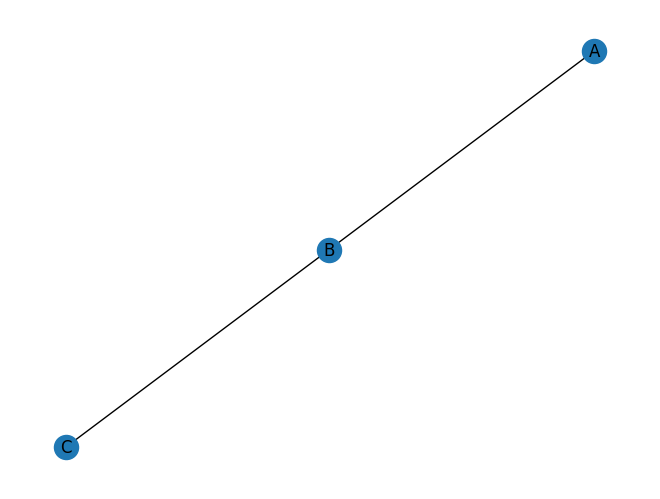

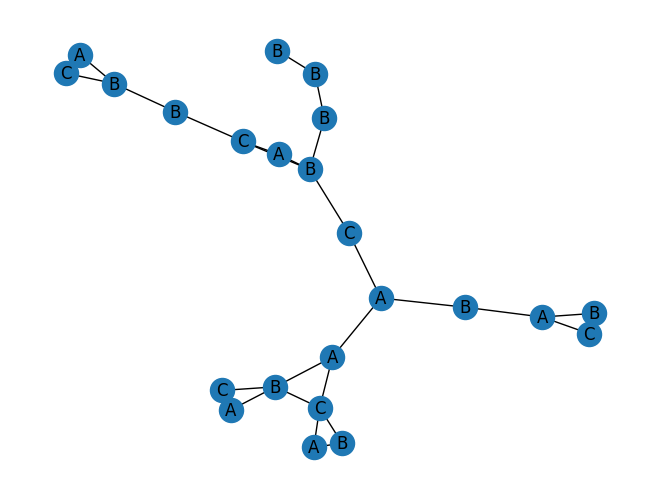

{0, 1}
{2}
{3, 4, 5, 6}
{7}
{8}
The MIS support for pattern [1, 2, 3] in G is: 5.000000


In [176]:
from networkx.algorithms import isomorphism

# Example pattern
P = nx.Graph()
P.add_nodes_from([(1,{"label":"A"}), (2,{"label":"B"}), (3,{"label":"C"})])
P.add_edges_from([(1,2),(2,3)])
labels = nx.get_node_attributes(P, 'label') 
plt.figure(1)
nx.draw(P,labels=labels)

# Example graph
G = nx.read_gml("data/graph.gml", label='id')
labels = nx.get_node_attributes(G, 'label') 
pos = nx.spring_layout(G)
plt.figure(2)
nx.draw(G,pos, labels=labels)

plt.show()

# Find the matches of P in G
nm = isomorphism.GraphMatcher(G,P,node_match=isomorphism.categorical_node_match("label", "A"))
matches = []
for subgraph in nm.subgraph_monomorphisms_iter():
    matches.append(subgraph)
    
print("The MIS support for pattern %s in G is: %f" %(P.nodes, mis_support(P, matches)))


In [ ]:
### EXTRA CODE BLOCK HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

# Part 2: Frequent itemsets (25 Points)
We have learned the Apriori and FP-Growth algorithms for mining frequent itemsets. In this part, we will implement these algorithms and test them against each other. 

We will use the anonymized real-world `retail market basket` data from: http://fimi.ua.ac.be/data/.
This data comes from an anonymous Belgian retail store, and was donated by Tom Brijs from Limburgs Universitair Centrum, Belgium. The original data contains 16,470 different items and 88,162 transactions. You may only work with the top-50 items in terms of occurrence frequency.
_Hint:_ We have used this dataset before.

The variable **retail_small** contains the top-50.

In [ ]:
from utilities.load_data import load_market_basket


def filter_transactions(T, k=50):
    """
        Keep only the top k items in the transactions.
        Remove transactions that become empty.
    """
    # Count occurences of each item
    counts = [0] * 16470
    for t in T:
        for i in t:
            counts[i] += 1

    # Sort and select top k
    counts = np.array(counts)
    order  = np.argsort(counts)[::-1] # reverse the sorted order

    indexes_to_keep = order[:k]       # Keep the top k items
    index_set = set(indexes_to_keep)  # Convert to python set for efficiency

    # Filter transactions
    T_new = [t_ for t_ in  [list(filter(lambda i: i in index_set, t)) for t in T]  if t_]
    return T_new

retail = load_market_basket()
retail_small = filter_transactions(retail)

## Task 2.1 Association Rules (4 Points)
Consider the following table

| transaction ID 	| Items           	|
|----------------	|-----------------	|
| 1              	| Ape,Cat,Dog,Cow     	|
| 2              	| Cat,Dog,Pig,Cow 	|
| 3              	| Dog,Bat,Pig,Cow 	|
| 4              	| Dog,Pig,Cow     	|
| 5              	| Dog,Cow         	|
| 6              	| Cat,Cow         	|
| 7              	| Ape,Bat,Fox     	|
| 8              	| Ape,Cow         	|
| 9              	| Ape,Dog,Cow     	|


### Task 2.1.1 (0.5 Points)
<span style='color: green'>**\[Motivate\]**</span> What is the count of the itemset {Dog,Pig,Cow} ?

*******************
The count of {Dog,Pig,Cow} is 3 \
The transaction id's which contribute towards the count are: 2, 3, 4

******************

### Task 2.1.2 (0.5 Points)
<span style='color: green'>**\[Motivate\]**</span>What is the support and confidence of the association rule {Dog,Pig}->Cow ?

*******************
The support is:
$$
s = \frac{\sigma(Dog, Pig, Cow)}{|T|} = \frac{3}{9} \approx 0.333
$$
The confidence is:
$$
c = \frac{\sigma(Dog, Pig, Cow)}{\sigma(Dog, Pig)} = \frac{3}{3} = 1
$$
******************

### Task 2.1.3 (1.5 Point)
<span style='color: green'>**\[Compute by hand\]**</span> Consider the application of the Apriori algorithm to find all the frequent itemsets
whose counts are at least 3.

*******************
When we start the algorithm, $k =1, C_1 = \text{all items}$.
Now let's determine $L_1$:
$$ L_1 = \{ \{Ape\}, \{Cat\}, \{Dog\}, \{Cow\}, \{Pig\} \} $$
$\{Fox\}$ and $\{Bat\}$ are removed, as the count of these itemsets in the database is below 3.


We now compute the new candidate set $C_2$:
$$ 
\begin{align*}
C_2 &= \{ \\
        &&&\{Ape, Cat\}, \{Ape, Dog\}, \{Ape, Cow\}, \{Ape, Pig\}, \\
        &&&\{Cat, Dog\}, \{Cat, Cow\}, \{Cat, Pig\},  \\
        &&&\{Dog, Cow\}, \{Dog, Pig\} \\
        &&&\{Cow, Pig\} \\
    &\}
\end{align*}
$$
And compute $L_2$ by pruning infrequent itemsets:
$$ 
L_2 = \{ \{Ape, Cow\}, \{Cat, Cow\}, \{Dog, Cow\}, \{Dog, Pig\}, \{Cow, Pig\} \}
$$
We can now compute a new candidate set $C_3$:
$$
\begin{align*}
C_3 &= \{ \\
        &&&\{Cow, Ape, Cat\}, \{Cow, Ape, Dog\}, \{Cow, Ape, Pig\}, \\
        &&&\{Cow, Cat, Dog\}, \{Cow, Cat, Pig\}, \{Cow, Dog, Pig\}  \\
    &\}
\end{align*}
$$
Once we prune $C_3$, we have $L_3$:
$$ 
L_3 = \{ \{Cow, Dog, Pig\} \}
$$
And now the algorithm terminates.
******************

### Task 2.1.4 (1.5 Point)
<span style='color: green'>**\[Compute by hand\]**</span> Find all the association rules with support at least 1/3 and confidence at least 1/2.

| transaction ID 	| Items           	|
|----------------	|-----------------	|
| 1              	| Ape,Cat,Dog,Cow     	|
| 2              	| Cat,Dog,Pig,Cow 	|
| 3              	| Dog,Bat,Pig,Cow 	|
| 4              	| Dog,Pig,Cow     	|
| 5              	| Dog,Cow         	|
| 6              	| Cat,Cow         	|
| 7              	| Ape,Bat,Fox     	|
| 8              	| Ape,Cow         	|
| 9              	| Ape,Dog,Cow     	|


*******************
Let's start by first computing all association rules with support of at least 1/3.\
Since support is computed by $s = \frac{\sigma(I)}{\vert T\vert}$ where $I$ is an itemset, and $T$ is the set of transactions, we can immediately see, that we have to find itemsets $I$, such that:
$$ s \geq \frac{1}{3} = \frac{\sigma(I)}{\vert T\vert} = \frac{\sigma(I)}{9} = \frac{\sigma(I)/3}{3} $$
thus we see the constraint on $\sigma(I)$:
$$ \frac{1}{3} = \frac{\sigma(I)/3}{3} \implies \sigma(I) = 3$$
This shows, that in the case that $\sigma(I)$ is less than 3, then $I$ will not satisfy our support requirement of being at least 1/3.\
So now we have reduced the problem to finding itemsets $I$ such that:
$$ \sigma(I) \geq 3 $$
We know from the previous exercise, that
$$
\begin{align*}
L_1 &= \{ \{Ape\}, \{Cat\}, \{Dog\}, \{Cow\}, \{Pig\} \} \\
L_2 &= \{ \{Ape, Cow\}, \{Cat, Cow\}, \{Dog, Cow\}, \{Dog, Pig\}, \{Cow, Pig\} \} \\
L_3 &= \{ \{Cow, Dog, Pig\} \}
\end{align*}
$$
So since these itemsets have a $\texttt{minsup}$ of 3, we can use these itemsets to search for association rules with confidence at least a half. We will ignore all rules such as $S \to \emptyset$ and $\emptyset \to S$, as these are not very interesting - thus all itemsets in $L_1$ for instance are not considered. This leaves us with the following rules to consider for $L_2$ and $L_3$:
$$
\begin{align*}
L_2:\\
\{Ape\} &\to \{Cow\}  &\quad c = \sigma(\{Ape, Cow\})/\sigma(\{Ape\}) = 3/4 &> 1/2 \\
\{Cow\} &\to \{Ape\}  &\quad c = \sigma(\{Ape, Cow\})/\sigma(\{Cow\}) = 3/8 &< 1/2 \\
\{Cat\} &\to \{Cow\}  &\quad c = \sigma(\{Cat, Cow\})/\sigma(\{Cat\}) = 3/3 &> 1/2 \\
\{Cow\} &\to \{Cat\}  &\quad c = \sigma(\{Cat, Cow\})/\sigma(\{Cow\}) = 3/8 &< 1/2 \\
\{Dog\} &\to \{Cow\}  &\quad c = \sigma(\{Dog, Cow\})/\sigma(\{Dog\}) = 6/6 &> 1/2 \\
\{Cow\} &\to \{Dog\}  &\quad c = \sigma(\{Dog, Cow\})/\sigma(\{Cow\}) = 6/8 &> 1/2 \\
\{Dog\} &\to \{Pig\}  &\quad c = \sigma(\{Dog, Pig\})/\sigma(\{Dog\}) = 3/6 &= 1/2 \\
\{Pig\} &\to \{Dog\}  &\quad c = \sigma(\{Dog, Pig\})/\sigma(\{Pig\}) = 3/3 &> 1/2 \\
\{Cow\} &\to \{Pig\}  &\quad c = \sigma(\{Cow, Pig\})/\sigma(\{Cow\}) = 3/8 &< 1/2 \\
\{Pig\} &\to \{Cow\}  &\quad c = \sigma(\{Cow, Pig\})/\sigma(\{Pig\}) = 3/3 &> 1/2 \\[2mm]
L_3:\\
\{Cow, Dog\} &\to \{Pig\} &\quad c = \sigma(\{Cow, Dog, Pig\})/\sigma(\{Cow, Dog\}) = 3/6 &= 1/2 \\
\{Cow, Pig\} &\to \{Dog\} &\quad c = \sigma(\{Cow, Dog, Pig\})/\sigma(\{Cow, Pig\}) = 3/3 &> 1/2 \\
\{Dog, Pig\} &\to \{Cow\} &\quad c = \sigma(\{Cow, Dog, Pig\})/\sigma(\{Dog, Pig\}) = 3/3 &> 1/2 \\
\{Cow\} &\to \{Dog, Pig\} &\quad c = \sigma(\{Cow, Dog, Pig\})/\sigma(\{Cow\}) = 3/8 &< 1/2 \\
\{Pig\} &\to \{Dog, Cow\} &\quad c = \sigma(\{Cow, Dog, Pig\})/\sigma(\{Pig\}) = 3/3 &> 1/2 \\
\{Dog\} &\to \{Pig, Cow\} &\quad c = \sigma(\{Cow, Dog, Pig\})/\sigma(\{Dog\}) = 3/6 &= 1/2 \\
\end{align*}
$$
Thus, we are left with the following association rules, which has support of at least 1/3 and confidence at least 1/2:
$$
\{Ape\} \to \{Cow\}, \{Cat\} \to \{Cow\}, \{Dog\} \to \{Cow\}, \{Cow\} \to \{Dog\}, \{Dog\} \to \{Pig\}, \\
\{Pig\} \to \{Dog\}, \{Pig\} \to \{Cow\}, \{Cow, Dog\} \to \{Pig\}, \{Cow, Pig\} \to \{Dog\}, \\
\{Dog, Pig\} \to \{Cow\}, \{Pig\} \to \{Dog, Cow\}, \{Dog\} \to \{Pig, Cow\}
$$
******************

## Task 2.2 A Priori algorithm (9 Points)

### Task 2.2.1(7 Points)
<span style='color: green'>**\[Implement\]**</span> Develop an implementation of the Apriori algorithm. You can look at your implementation from the exercises (note that this one is slightly different to simplify comparison with FP-Growth).

In [ ]:
def apriori_algorithm(T, min_support=10):
    """
        Apriori algorithm for mining frequent itemsets and association rules. 
        This implementation should just find frequent itemsets, and ignore the rule generation.
        Inputs:
            T:               A list of lists, each inner list will contiain integer-item-ids. 
                             Example: T = [[1, 2, 5], [2, 3, 4], [1, 6]]
            min_support:     int: The total number of occurences needed for an itemset to be considered frequent
        
        Outputs:
            itemsets:        Dictionary of with keys as frequent itemset, and value as the total count of this itemset 
    """
    itemsets = dict()
    ### TODO Your code here
    
    # Create a list of all unique items from T
    C_k = set()
    [[C_k.add((i,)) for i in t] for t in T]
    # Now k = 1, and C_k contains all candidates of size 1

    while len(C_k) > 0:
        L_k = set()
        # Frequent itemset generation
        counts = dict.fromkeys(C_k, 0)
        for c in C_k:
            for t in T:
                if set(c).issubset(t):
                    counts[c] = counts[c]+1
        # Pruning candidates not satisfying min_support
        [L_k.add(c) for c in C_k if counts[c] >= min_support]
        
        # Add L_k to itemsets
        for item_set in L_k:
            itemsets[item_set] = counts[item_set]            

        # Candidate generation
        C_k = compute_candidates(L_k)

    ### TODO Your code here
    return itemsets

def compute_candidates(prev_itemset):
    Ck = set()
    # Join step
    for itemset in prev_itemset:
        its1 = tuple(sorted(itemset))
        for itemset2 in prev_itemset:
            its2 = tuple(sorted(itemset2))
            if its1[:-1] == its2[:-1]:
                if its1[-1] < its2[-1]: Ck.add(its1 + its2[-1:])

    # Pruning step
    to_remove = set()
    for c in Ck:
        for subset in combinations(c, len(c)-1):
            if not subset in prev_itemset:
                to_remove.add(c)
                break
    for c in to_remove:
        Ck.remove(c)
    
    return Ck

################ TESTS BELOW ####################

items = ["Bread", "Milk", "Diaper", "Beer", "Eggs", "Coke"]
def i(s):
    return items.index(s)+1
T = [[i("Bread"), i("Milk")],
     [i("Bread"), i("Diaper"), i("Beer"), i("Eggs")],
     [i("Milk"), i("Diaper"), i("Beer"), i("Coke")],
     [i("Bread"), i("Milk"), i("Diaper"), i("Beer")],
     [i("Bread"), i("Milk"), i("Diaper"), i("Coke")]]

def print_freq(d):
    for x in d.keys():
        print(*list(map(lambda k: items[k-1], list(x))), sep=", ", end="")
        print(":", d[x])

#| transaction ID 	| Items           	|
#|----------------	|-----------------	|
#| 1              	| Ape,Cat,Dog,Cow     	|
#| 2              	| Cat,Dog,Pig,Cow 	|
#| 3              	| Dog,Bat,Pig,Cow 	|
#| 4              	| Dog,Pig,Cow     	|
#| 5              	| Dog,Cow         	|
#| 6              	| Cat,Cow         	|
#| 7              	| Ape,Bat,Fox     	|
#| 8              	| Ape,Cow         	|
#| 9              	| Ape,Dog,Cow     	|

items = ["Ape", "Cat", "Dog", "Cow", "Bat", "Pig", "Fox"]
def i(s):
    return items.index(s)+1
T = [[i("Ape"), i("Cat"), i("Dog"), i("Cow")],
     [i("Cat"), i("Dog"), i("Pig"), i("Cow")],
     [i("Dog"), i("Bat"), i("Pig"), i("Cow")],
     [i("Dog"), i("Pig"), i("Cow")],
     [i("Dog"), i("Cow")],
     [i("Cat"), i("Cow")],
     [i("Ape"), i("Bat"), i("Fox")],
     [i("Ape"), i("Cow")],
     [i("Ape"), i("Dog"), i("Cow")]
     ]

print_freq(apriori_algorithm(T, 3))



Pig: 3
Cat: 3
Cow: 8
Ape: 4
Dog: 6
Cat, Cow: 3
Dog, Cow: 6
Cow, Pig: 3
Ape, Cow: 3
Dog, Pig: 3
Dog, Cow, Pig: 3


### Task 2.2.2 (2 Points)
<span style='color: green'>**\[Implement\]**</span> Run Apriori on the data-set (using the **retail** variable and not the small one). Try a few different values of min_support. </br>
<span style='color: green'>**\[Describe\]**</span>Roughly how large does min_support need to be before no itemsets of size 2 are found? (You don't need to find the excact value. Nearest 1000 is fine).

Note that the dataset is reasonably large, so this **can take up a large amount of time depending on your value of min support and implementation.**

In [ ]:
apriori_algorithm(retail, 29143)

{(48,): 42135, (39,): 50675}

******************
$\texttt{min\_support}$ has to be at least 29143 in order to prune the last itemset of size 2; namely the itemset (39, 48) with a count of 29142.\
As the itemset (39, 48) is the only frequent itemset of size 2 with $\texttt{min\_support} = 29142$, this tells us that if 48 or 39 is in a transaction where both items are not present, then 48 (and/or) 39 will be frequent at $\texttt{min\_support} = 29143$. This is indeed the case, as the itemset 48 has a count of 42135 and the itemset 39 has a count of 50675, which is the only remaining size-1 itemsets.
******************

## Task 2.3 FP-Growth (9 Points)

### Task 2.3.1 (7 Points)
<span style='color: green'>**\[Implement\]**</span> Complete the implementation of FP-Growth below. You only need to implement growing the tree and building the header table. It is clearly marked where you need to implement.

In [63]:
from collections import Counter

class FP_Tree:
    def __init__(self, T, min_support=10):
        """
        Constructor for FP_Tree. Should correctly build an FP-Tree with header table.
        Hint: I strongly advise you to implement the missing sections of the Node class before this one
        
        Inputs:
            T:               A list of lists, each inner list will contiain integer-item-ids. 
                             Example: T = [[1, 2, 5], [2, 3, 4], [1, 6]]
            min_support:     The total number of occurences needed to keep the itemset.
        """
        self.min_support    = min_support
        self.header_table   = {}
        self.root           = Node(header_table = self.header_table)

        ### YOUR CODE HERE

        # Optimization: Prune all itemsets of size 1 from transactions, if they are infrequent

        # 1) Get counts for all distinct items
        counts = Counter(i for t in T for i in t)
        # 2) Determine all infrequent itemsets of size 1
        infreq_single_itemsets = set([i for i, count in counts.items() if count < min_support])
        
        # 3) Remove infrequent items from transactions
        filtered = [set(t)-infreq_single_itemsets for t in T]
        T = [np.sort([x for x in t if x in filtered[idx]]).tolist() for idx, t in enumerate(T) if len(filtered[idx]) > 0]

        for t in T:
            self.root.add_path(t)

        ### YOUR CODE HERE
    
    
    ### Common functions for FP-tree and Conditional FP-tree
    ### You do not need to modify the rest of this class
    def generate_pattern(self, keys, support):
        return tuple(keys + self.get_suffix()), support
    
    def get_suffix(self):
        return []
    
    # This is the main function for generating frequent itemsets. You do not need to modify this,
    # but I recommend reading and trying to understand it.
    def mine_frequent_itemsets(self, res=None):
        if res is None: res = []
        
        if self.root.is_single_path():
            keys = list(self.header_table.keys())
            key_idx = {k:i for i, k in enumerate(keys)}
            counts = [self.header_table[k].count for k in keys]
            
            for key_pair in itertools.chain(*[itertools.combinations(keys, k) for k in range(1, len(keys)+1)]):
                support = min([counts[key_idx[k]] for k in key_pair])
                if support >= self.min_support: 
                    res.append(self.generate_pattern(list(key_pair), support))
         
        else: # Not single path
            for key, node in self.header_table.items():
                support = node.support()
                
                if support >= self.min_support:
                    res.append( self.generate_pattern([key], support) )
                
                basis = []
                while node is not None:
                    curr_node = node
                    node = node.nodelink
                    
                    if curr_node.parent is None:  continue
                        
                    path = curr_node.path(limit=curr_node.count)[:-1]
                    if len(path) == 0:  continue
                        
                    basis.append( path )
                    
                if len(basis) == 0: continue
                    
                conditional_tree = Conditional_FP_Tree(self.min_support, [key] + self.get_suffix(), basis)
                if conditional_tree.root is None: continue
                    
                conditional_tree.mine_frequent_itemsets(res=res)
        return res


# You don't need to modify anything in this class
class Conditional_FP_Tree(FP_Tree):
    def __init__(self, min_support, suffix, basis): 
        self.min_support    = min_support
        self.suffix         = suffix
        self.header_table   = {} # This will hold all unique items
        
        self.root           = Node(header_table=self.header_table)
        
        self.build_tree(basis)
        # self.root           = prune(self.root, min_support)
        if self.root is None: print("WARNING: root is empty after pruning")
        
    def build_tree(self, basis):
        for b in basis:
            count = b[0][1]
            path = list(map(lambda x: x[0], b))
            for i in range(count):
                self.root.add_path(path)
    
    def get_suffix(self):
        return self.suffix

class Node:
    def __init__(self, header_table, value=None, parent=None, path=None):
        """
        Constructor for Node class, which is used for the FP-Tree. 
        Inputs:
            header_table:    Dict. Should be same dict for all nodes in the tree
            value:           Integer id of the item the node represents
            parent:          Parent Node. None if root node
            path:            List of node values for a path that should start in this node.
        """
        
        self.children     = {} # This is a dict from id -> node
        self.header_table = header_table 
        self.nodelink     = None
        self.value        = None
        self.parent       = None
        self.count        = 0
        
        if value is not None: # Only root node should have None as value
            self.value          = value
            self.parent         = parent
            # YOUR CODE HERE
            self.count = 1
            # YOUR CODE HERE
        
        if path is not None: 
            self.add_path(path)
            
    
    def add_path(self, path):
        """
        Function for adding a path to tree. 
        Should follow an existing path and increment count while such a path exists. 
        If no path exists (or only partial path exists), this function should create or complete such a path
        Hint: Recursion might be helpful.
        Inputs:
            path:            A list node values. 
                             Example: path = [1, 2, 5]
        """
        ### YOUR CODE
        # See if we can follow a path from this node
        if path[0] in self.children:
            child_to_follow = self.children[path[0]]
            child_to_follow.count += 1 # Increment the count, as we pass this node
            # Try to add the remaining path from the child to follow
            if len(path) >= 2: # Why two? Well, we just inserted path[0]
                child_to_follow.add_path(path[1:])
        else:
            # No path was found. We should insert the path to the node as a child
            new_node = Node(header_table=self.header_table,value=path[0],parent=self,path=None)
            self.children[path[0]] = new_node

            if path[0] not in self.header_table:
                self.header_table[path[0]] = new_node
            else:
                # Set nodelink of the newly inserted node to point at the old node
                new_node.nodelink = self.header_table[path[0]]
                # Update header table: Should point at the newly inserted node
                self.header_table[path[0]] = new_node
            
            if len(path) >= 2:
                new_node.add_path(path[1:])
        
        
        ### YOUR CODE
    
    
    # Functions for frequent items-sets and rule mining below. You do not need to modify these
    def is_single_path(self):
        if   len(self.children) == 0: return True 
        elif len(self.children) >  1: return False
        else:  # len == 1
            key = next((k for k in self.children.keys()))
            return self.children[key].is_single_path()
    
    def support(self, verbose=False):
        if verbose: print("Counting support, this value is ", self.value, " with count ", self.count, " and parent ", self.parent.value)
            
        if self.nodelink is not None: return self.count + self.nodelink.support(verbose)
        else:                         return self.count
    
    def path(self, limit=-1):
        if self.value is None: 
            return []
        else:                  
            count = self.count if limit == -1 else min(self.count, limit)
            return self.parent.path(limit=limit) + [(self.value, count)]
    
    def print(self, indent="", spacing="----|-"):
        print(indent + str(self.value) + ":" + str(self.count))
        for v in self.children.values():
            v.print(indent=indent + spacing)
            



In [70]:
### YOUR TEST CODE HERE

# Use l as symbols
l = ["A", "B", "C", "D", "E"]
# Convert symbol to integer ID
def i(s):
    return l.index(s)+1

# Transactions as ID's from symbols
# (T is from example in slides)
T = [
    [i("A"), i("B")],
    [i("B"), i("C"), i("D")],
    [i("A"), i("C"), i("D"), i("E")],
    [i("A"), i("D"), i("E")],
    [i("A"), i("B"), i("C")],
    [i("A"), i("B"), i("C"), i("D")],
    [i("B"), i("C")],
    [i("A"), i("B"), i("C")],
    [i("A"), i("B"), i("D")],
    [i("B"), i("C"), i("E")]
]

# Print symbols from integer IDs in transaction T
def print_inv(T):
    print("Printing transactions:")
    for t in T:
        for i in t:
            print(l[i-1], end="")
        print("")

print_inv(T)

print("\nPrinting FP Tree:")
fp_t = FP_Tree(T,1)
fp_t.root.print()

print("\nHeader Table:")
def get_path(n):
    if n.value is None:
        return "root"
    return l[n.value-1] + "-" + get_path(n.parent)
for h in fp_t.root.header_table.keys():
    print(h, ":", get_path(fp_t.header_table[h]))




Printing transactions:
AB
BCD
ACDE
ADE
ABC
ABCD
BC
ABC
ABD
BCE

Printing FP Tree:
None:0
----|-1:7
----|-----|-2:5
----|-----|-----|-3:3
----|-----|-----|-----|-4:1
----|-----|-----|-4:1
----|-----|-3:1
----|-----|-----|-4:1
----|-----|-----|-----|-5:1
----|-----|-4:1
----|-----|-----|-5:1
----|-2:3
----|-----|-3:3
----|-----|-----|-4:1
----|-----|-----|-5:1

Header Table:
1 : A-root
2 : B-root
3 : C-B-A-root
4 : D-B-A-root
5 : E-C-B-root


### Task 2.3.2 (2 Points)
<span style='color: green'>**\[Implement\]**</span> Run FP-Growth on the data-set (using the **retail** variable and not the small one). Try a few different values of min_support. </br>
<span style='color: green'>**\[Describe\]**</span> Roughly how large does min_support need to be before all itemsets of size 1 and 2 are found but no itemsets of size 3? (You don't need to find the excact value. Nearest 1000 is fine)

In [75]:
### YOUR CODE HERE
fp_t = FP_Tree(retail,20000)
fp_t.mine_frequent_itemsets()

[((39,), 50675), ((48,), 42135), ((39, 48), 29142)]

Same as in the last exercise; 21942 removes (39,48)

## Task 2.4 Comparing A priori and FP-Growth (3 Points)
<span style='color: green'>**\[Describe\]**</span> Run the given experiment and show to what extent FP-Growth has an advantage. Comment on the results. What do you see? What do you expect to see?

In [77]:
# Script for testing the runtime of your algorithms. 
# WARNING: This will take a reasonably long time to run.

import numpy as np
import time
    
def sample(n=200, alphabet_size=5):
    candidates  = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])[:alphabet_size]
    m = candidates.shape[0]
    
    T = []
    for i in range(n):
        size = int(np.random.rand() * (m)) + 1
        T.append(list(candidates[np.random.permutation(m)[:size]]))
        
    return T

def test():
    # If you want to test it quickly, you can modify "transaction_lengths" and "alphabet_sizes" temporarily. 
    # This will give you errors in the plotting (next code cell) though.
    # Make sure you use the original values for "transaction_lengths" and "alphabet_sizes" for your final version.
    transaction_lengths = [2**i for i in range(4, 11)]
    alphabet_sizes      = [3, 6, 9, 12] 
    
    min_support = 10
    repeats     = 10
    
    stop = False
    results = np.zeros((len(transaction_lengths), len(alphabet_sizes), 2))
    stderrs = np.zeros((len(transaction_lengths), len(alphabet_sizes), 2))
    
#     print(results.shape)
    
    for i, n in enumerate(transaction_lengths):
        for j, a in enumerate(alphabet_sizes):
            print(" - - " * 4, "n=%d,a=%d" % (n, a), " - - " * 4)
            times = []
            for _ in range(repeats):
                T = sample(n, a)

                t0 = time.time()
                tree = FP_Tree(T, min_support=min_support)
                frequent_itemsets = tree.mine_frequent_itemsets()
                t1 = time.time() - t0

                i1 = {tuple(sorted(list(k))): v for k, v in frequent_itemsets}

                t0 = time.time()
                itemsets = apriori_algorithm(T, min_support=min_support)
                t2 = time.time() - t0

                i2 = {}
                for k,v in itemsets.items():
                    i2[tuple(sorted(list(k)))] = v

                assert len(i1) == len(i2)
                for k in i1.keys():
                    assert i1[k] == i2[k]

                times.append([t1, t2])

            results[i, j] = np.mean(times, axis=0)
            stderrs[i, j] = np.std(times, axis=0)
            print(np.mean(times, axis=0), "+-", np.std(times, axis=0), "\n")
            
    np.save('itemsets_runningtimes', results)  # Results are saved to avoid having to run it again if plot code needs changing
    np.save('itemsets_stderr', stderrs)
    
    return results, stderrs
        
results, stderrs = test()     



 - -  - -  - -  - -  n=16,a=3  - -  - -  - -  - - 
[2.43425369e-04 7.88927078e-05] +- [6.55073432e-05 1.84029029e-05] 

 - -  - -  - -  - -  n=16,a=6  - -  - -  - -  - - 
[0.00043092 0.00014918] +- [3.73135987e-04 7.16473853e-05] 

 - -  - -  - -  - -  n=16,a=9  - -  - -  - -  - - 
[0.00098135 0.00025365] +- [0.00127437 0.00014955] 

 - -  - -  - -  - -  n=16,a=12  - -  - -  - -  - - 
[0.00151079 0.00025671] +- [0.003352   0.00011632] 

 - -  - -  - -  - -  n=32,a=3  - -  - -  - -  - - 
[0.00050485 0.00020487] +- [2.01975051e-04 5.18407799e-05] 

 - -  - -  - -  - -  n=32,a=6  - -  - -  - -  - - 
[0.00123534 0.00080273] +- [0.00036448 0.0003829 ] 

 - -  - -  - -  - -  n=32,a=9  - -  - -  - -  - - 
[0.00632985 0.00774207] +- [0.00109005 0.00652584] 

 - -  - -  - -  - -  n=32,a=12  - -  - -  - -  - - 
[0.05100851 0.0105984 ] +- [0.03457421 0.0066996 ] 

 - -  - -  - -  - -  n=64,a=3  - -  - -  - -  - - 
[0.00066664 0.0002984 ] +- [1.88471341e-04 7.09088440e-05] 

 - -  - -  - -  - -  n

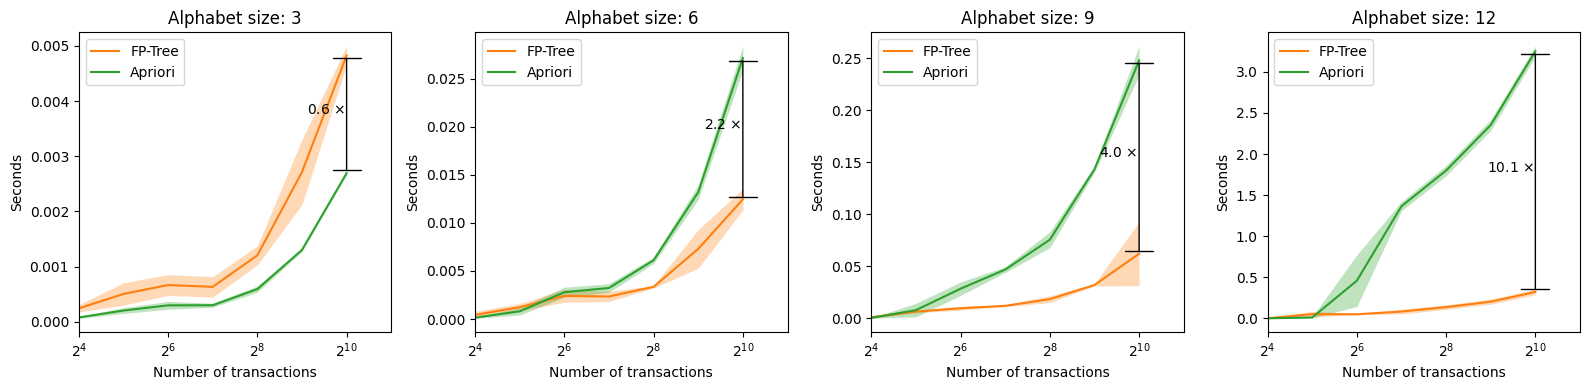

In [78]:
import matplotlib.pyplot as plt

results = np.load('itemsets_runningtimes.npy')
stderrs = np.load('itemsets_stderr.npy')

# Plotting 
transaction_lengths = [2**i for i in range(4, 11)]
alphabet_sizes      = [3, 6, 9, 12] 

n, a, _ = results.shape
res_to_plot = np.transpose(results, (1, 0, 2))
err_to_plot = np.transpose(stderrs, (1, 0, 2))

fig, ax = plt.subplots(1, a, figsize=(4*a, 4))
for i, (res, err) in enumerate(zip(res_to_plot, err_to_plot)):
    ax[i].plot(transaction_lengths, res[:,0], label='FP-Tree', color='C1')
    ax[i].fill_between(transaction_lengths, res[:,0] - err[:,0], res[:,0] + err[:,0], alpha=0.3, linewidth=0 , color='C1')
    
    x = transaction_lengths[-1]
    ax[i].set_xlim((2**4, 2**11))
    ax[i].annotate(text='', xy=(x, res[-1,0]), xytext=(x,res[-1,1]), arrowprops=dict(arrowstyle='|-|'))
    ax[i].annotate(text='%.1f $\\times$'%(res[-1,1]/res[-1,0]), xy=(x-24,  (res[-1,1] / 2 + res[-1,0]/2)), horizontalalignment='right')
    
    ax[i].plot(transaction_lengths, res[:,1], label='Apriori', color='C2')
    ax[i].fill_between(transaction_lengths, res[:,1] - err[:,1], res[:,1] + err[:,1], alpha=0.3, linewidth=0 , color='C2')
    
    ax[i].set_title("Alphabet size: %d" % alphabet_sizes[i])
    ax[i].set_xscale('log', base=2)
    ax[i].legend()
    ax[i].set_xlabel('Number of transactions')
    ax[i].set_ylabel('Seconds')

plt.tight_layout()
    

*******************
From the above, we see that for many transactions the FP-Tree works better. This is expected, as the apriori algorithm runs a lot of time through the transactions database, whilst the FP-tree works on the constructed data structure, which we only have to pay $O(1)$ in terms of transaction database size for generating. The difference really becomes apparent, as the alphabet size increases. This is due to the fact that the apriori algorithm has to scan the entire database to compute the support for each candidate itemset, and when we increase the alphabet size, we also exponentially increase the number of itemsets.
******************

# Part 3: Sequence Segmentation and LSH (30 Points)
The Dynamic Programming algorithm for optimally segmenting a sequence $S$ of length $n$ 
into $B$ segments, that we have introduced, is expressed by the following recursive equation:

$$
E(i, b) = \min_{j < i}\left[ E(j, b-1) + Err(j+1, i)\right]
$$

where $Err(j+1, i)$ is the error of a segment that contains items from $j+1$ to $i$.

In this part, you will have to answer some questions on this.

**Note:** 
For those of you, who are not used to analyzing algorithms: by time-complexity and space-complexity, 
we refer to the theoretical computation time and memory usage, respectively, as a function of the problem size, i.e., as a 
function of $n$ and $B$ in Problem 3. We use [Big O notation](https://en.wikipedia.org/wiki/Big_O_notation)
to specify this. You should **not** infer it by implementing it in practice ;-) 
Again, when in doubt, ask on Discord, Blackboard or shoot Jon an email. 

## Task 3.1 Sequence segmentation (20 Points)

************
<span style='color: red'>**These questions are hard. First complete the rest of the exercises and then come back to solve 3.1.**</span>
************


### Task 3.1.1
<span style='color: green'>**\[Describe\]**</span> what is the default space-complexity of this algorithm?

*******************
The dynamic programming algorithm requires $O(nk)$ space. This is because we need to construct an $n$ by $n$ table, where in order to compute for instance a cell in row $k$ column $i$, we would need to examine every cell in $k-1$ for columns less than $i$.
******************

### Task 3.1.2 
<span style='color: green'>**\[Describe\]**</span> what happens if we are willing to recompute some tabulated results. Can we then reduce the default space-complexity? _Exactly how_? What is the space-complexity then?

*******************
If we are allowed to recompute the results and store the segments, and we only need to be able to compute the minimum of the previous error and the cost of placing the boundary there. Then we can reduce the space complexity as follows. It takes $O(n)$ space to calculate the previous minimum error. From a specific point, we need to use $O(n + n) = O(n)$ space. It takes $O(B)$ to store the boundary values for the segments. Also an optimal solution for a previous segmentation is also the optimal solution for the forthcoming data. Therefore we can reduce the space complexity to $O(n + B)$.
******************

### Task 3.1.3 
<span style='color: green'>**\[Motivate\]**</span> what is the cost of using the space-efficiency technique described in Task 3.1.2 in terms of time-complexity.

*******************
The time complexity is $O(n^2B^2)$. first we need to precompute the partial sums $\sum_{j + 1 \leq t \leq i} t$ and $\sum_{j + 1 \leq t \leq i} t^2$.
That is we can compute the first sum. Then store it. Copy the result and square all entrances so we have the square of the sum.

After precomputing the results we need to get the placements of the boundaries that is minimum. That is we need to compute the cost of this boundary placement and compute everything prior as well. For one row, computing the total cost of all the costs and finding the minimum one takes $O(n^2B)$ and such for all $B$ rows the time complexity is $O(n^2B^2)$.


******************

### Task 3.1.4 
For the sub-problem of segmenting the $i$-prefix of sequence $S$ into $b$ segments, consider 
    the segment $M(i, b)$ that contains (if such segment exists) the middle item of 
    index $\lfloor \frac{n}{2} \rfloor$. The boundaries of $M(i, b)$ can be detected and tabulated 
    along with each $E(i, b)$ solution. 

<span style='color: green'>**\[Describe\]**</span> a method that reduces the time-complexity burden identified in Task 3.1.3, based on the above observarion. 
    _(hint: use [divide-and-conquer](https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm))_

*******************
We can use the divide and conquer method to reduce the time complexity and to solve the sub-problem of segmenting the i-prefix of a sequence into $b$ segments. 

We will do this in a recursive fashion so we define a function $$segmentSequence(start, end, i, b)$$, that segments the input, by splitting it into sub problems of half the input size.

The function takes a start index, and end index and inputs i, b to calculate the middle item.

To solve the sub-problem of segmenting the $i$-prefix of sequence *S* into *b* segments, we will call the function with parameters $segmentSequence(0, n, i, b)$, where i is the prefix index, that we want segmented, b is the number of segments we want to divide the sequence into, start is the index of the first element in the sequence we consider and end the last index of the item to consider in the sequence.

The code for the recursive divide and conquer method could be as follows:

    function segmentSequence(i, b, start, end):
        if b == 1:
            return [start, end]
        
        mid = floor((start + end) / 2)
        min_cost = infinity
        optimal_boundary = left
        
        for k = start to end - b + 1:
            cost = E(start, k) + E(k+1, mid) + E(mid+1, end)
            if cost < min_cost:
                min_cost = cost
                optimal_boundary = k
        
        left_boundaries = segmentSequence(i, b-2, start, optimal_boundary)
        right_boundaries = segmentSequence(i, b-2, optimal_boundary + 1, end)
        
        return concatenate(left_boundaries, [optimal_boundary], right_boundaries)

Here we define the base case to be $b = 1$, since we just need to return the boundaries, since we are only considering the segment given. That means we do not need to place a boundary and can just return  segment defined by start and end.

We then calculate the middle element $M(i,b) = $\lfloor\frac{start + end}{2}\rfloor$ and set the cost to infinity, since we need to do a minimum scan of all the elements and keep the smallest cost.

Then we iterate over all the indicies i range start to $end - b + 1$ and calculate the costs for each of the placements along the sequence. The reason why, we don't calculate in the complete range, is because we need to place $b$ boundaries. We calculate the cost by summing the error between the start element and k, the element after k to the middle element and then the cost from the element after the middle element to the end.

We save the cost and index k, if we have reached a new minimum cost.

Then we will do recursion on the left sequence and right sequence based on the optimal boundry we have found so far.
We will return a concatenation of the left subproblem, the optimal boundary we just placed and the solution to the right suproblem.

******************

### Task 3.1.5 
<span style='color: green'>**\[Motivate\]**</span> what is the time complexity when using the technique proposed in Task 3.1.4?

*******************

In the recursive approach, the algorithm divides the problem into smaller subproblems by recursively calling itself. The time complexity of this approach can be analyzed using the concept of a recurrence relation.

Let's assume the length of the sequence is n and the number of segments is b.

In the recursive approach, at each recursive call, the algorithm explores all possible boundary positions within the current prefix. This involves iterating over n - b + 1 possible boundary positions. Then we recurse and consider the to halfs defined by the optimal boundary. The the number of elements in the to sub problems are of size n total so each approximates $n/2$. This will be done until we have reached $b=1$. So this is bounded by b. We assume that $b \leq \log n$ such that we will have a recursion tree with depth of size $\log n$. Meaning we will do $\log n$ steps with the cost of placing the $i$'th boundary.

For each boundary position, the algorithm makes recursive calls with a reduced number of segments. In the worst case, the number of segments is reduced by 1 at each recursive call until it reaches 1. Therefore, the number of recursive calls can be approximated as b (although it may be slightly lower due to the termination condition when b reaches 1). The cost of processing the cuts are $O(n)$ since we first need to compute the mean and then subtract the mean from all the elements and sum the results. We do this for three segments, the middle, and the left and the right sections of the sequence. This is roughly $O(n/3 * 3) = O(n)$.

Considering the worst-case scenario, the total number of recursive calls made by the algorithm can be approximated as $O(b \cdot (n - b + 1) \cdot \log n) = O(b\cdot n \log n -b^2\cdot \log n + b \cdot log(n)) \approx O(n \log nb)$.
******************

## Task 3.2 Min Hashing (6 Points)

In this exercise we will see the **One-pass implementation** of the MinHash signatures.<br>

### Task 3.2.1 
<span style='color: green'>**\[Implement\]**</span> Implement the One-pass algorithm for the MinHash Signatures (and the jaccard simmilarity matrix).

In [ ]:
#C is the Input Matrix (Shingles x Documents)
#J_sim is a jaccard similarity matrix (Documents x Documents)
def jaccard_simmilarity_matrix(C):
    J_sim = None
    ### YOUR CODE STARTS HERE
    def intersection(a, b):
        return np.sum((a == b) & (a == 1))
    
    def union(a, b):
        return np.sum((a == 1) | (b == 1))
    
    J_sim = np.zeros((C.shape[1], C.shape[1]))
    for i in range(C.shape[1]):
        for j in range(i+1, C.shape[1]):
            J_sim[i, j] = intersection(C[:, i],C[:, j]) / union(C[:, i], C[:, j])
            J_sim[j, i] = J_sim[i, j]
    ### YOUR CODE ENDS HERE
    return J_sim

#C is the Input Matrix (Shingles x Documents)
#no_of_permutations is the how many permutations we will use
#C_new is the Output Matrix (no_of_permutations x Documents)
def one_pass_hashing(C, no_of_permutations):
    C_new = None
    ### YOUR CODE STARTS HERE
    # Make one pass hashing
    C_new = np.zeros((no_of_permutations, C.shape[1]))
    for i in range(no_of_permutations):
        permutation = np.random.permutation(C.shape[0])
        for j in range(C.shape[1]):
            C_new[i, j] = np.min(permutation[C[:, j] == 1])
    ### YOUR CODE ENDS HERE
    return C_new


### Task 3.2.2 

<span style='color: green'>**\[Implement\]**</span> For the matrix below run your implementation for different number of permutations in the range [1,4] and report: a) the Output Matrix C_new and  b) the jaccard similarity matrix of C_new.

In [ ]:
### YOUR CODE HERE
A = np.array([[1, 0, 0, 1, 0], [0, 0, 1, 0, 0], [0, 1, 0, 1, 1], [1, 0, 1, 1, 0]]).transpose()

for i in range(1, 4):
    C_new = one_pass_hashing(A, i)
    print('C_new: \n', C_new)
    print()
    print('J_sim: \n', jaccard_simmilarity_matrix(A))
    print()


C_new: 
 [[1. 3. 0. 1.]]

J_sim: 
 [[0.         0.         0.25       0.66666667]
 [0.         0.         0.         0.33333333]
 [0.25       0.         0.         0.2       ]
 [0.66666667 0.33333333 0.2        0.        ]]

C_new: 
 [[0. 3. 1. 0.]
 [0. 2. 1. 0.]]

J_sim: 
 [[0.         0.         0.25       0.66666667]
 [0.         0.         0.         0.33333333]
 [0.25       0.         0.         0.2       ]
 [0.66666667 0.33333333 0.2        0.        ]]

C_new: 
 [[3. 2. 0. 2.]
 [0. 2. 0. 0.]
 [0. 3. 0. 0.]]

J_sim: 
 [[0.         0.         0.25       0.66666667]
 [0.         0.         0.         0.33333333]
 [0.25       0.         0.         0.2       ]
 [0.66666667 0.33333333 0.2        0.        ]]



<span style='color: green'>**\[Motivate\]**</span> Suppose we have 4 documents named as X,Y,Z and W and their signatures are given by the input matrix $C$ as:
$$\begin{matrix} X & Y & Z & W \\1 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & 1 & 1\\0 & 0 & 1 & 0 \end{matrix}$$

*******************
Petros Petsinis wrote that this was a typo so we will not give any answer.
******************

### Task 3.2.3 
Suppose we have two hash functions (permutations) as <br> $h_1(x) = (x + 1) mod 5$  and  $h_2(x)=(3x + 1) mod 5$ 
<span style='color: green'>**\[Describe\]**</span> and <span style='color: green'>**\[Compute by Hand\]**</span> the steps of the one-pass implementation.

*******************
First we initialize two tables T1 and T2 which are going to be the corresponding hashtables for h1 and h2 respectively:

T1 = []
T2 = []

Then for each row in matrix C, we are going to evaluate the two hash functions on the index and receive the corresponding index in which we store the value from the original matrix C.
After we are going to interchange the order responsing to the hash evaluated on the index of each row, obtaining T1 and T2 respectively:

$h1(0) = (0 + 1) \mod 5 = 1$ <br>
$h1(1) = (1 + 1) \mod 5 = 2$ <br>
$h1(2) = (2 + 1) \mod 5 = 3$ <br>
$h1(3) = (3 + 1) \mod 5 = 4$ <br>
$h1(4) = (4 + 1) \mod 5 = 0$ <br>

This gives us the table T1:

$T1 = \begin{matrix} X & Y & Z & W \\0 & 0 & 1 & 0\\1 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & 1 & 1 \end{matrix}$

$h2(0) = (0 * 3 + 1) \mod 5 = 1$ <br>
$h2(1) = (1 * 3 + 1) \mod 5 = 4$ <br>
$h2(2) = (2 * 3 + 1) \mod 5 = 2$ <br>
$h2(3) = (3 * 3 + 1) \mod 5 = 0$ <br>
$h2(4) = (4 * 3 + 1) \mod 5 = 3$ <br>



$\begin{matrix}T2 =  X & Y & Z & W \\0 & 0 & 1 & 0 \\0 & 0 & 1 & 0\\ 0 & 1 & 0 & 1 \\1 & 0 & 0 & 1 \\ 1 & 0 & 1 & 1 \end{matrix}$

******************

## Task 3.3 Locality Sensitive Hashing (4 points)

### Task 3.3.1 

<span style='color: green'>**\[Implement\]**</span> code that evaluate the S-curve $1-(1-s^r)^b$ for $s\in [0,1]$ for the following values of $r$ and $b$ 
1. $r = 3$ and $b = 10$
2. $r = 6$ and $b = 20$
3. $r = 5$ and $b = 50$

You can use, or modify, the helper plotting code below. 

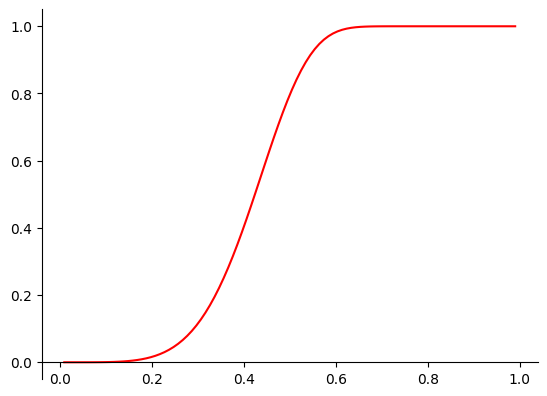

In [ ]:
### YOUR CODE HERE
def s_curve(r, b):
    def f(x):
        return 1 - (1 - x**r)**b
    return f
### YOUR CODE HERE

x = np.linspace(0.01,0.99,100)
y = s_curve(5,50)(x)

def plot_function(x,y): 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x,y, 'r')

    # show the plot
    plt.show()
    
plot_function(x,y)

### Task 3.3.2 

<span style='color: green'>**\[Describe\]**</span> For each of the (r,b) pairs in Task 3.2.1, compute the value of $s$ for which the value of $1-(1-s^r)^b$ is exactly 1/2. How does this value compare with the estimate of $(1/b)^{1/r}$

In [ ]:
params = [[3, 10], [6, 20], [5, 50]]

def estimate(r,b):
    return (1 / b)**(1/r)

def s_curve_inverse(r, b):
    x = (1 - (1/2) ** (1/b))**(1/r)
    return x


for r, b in params:
    print('r = %d, b = %d' % (r, b))
    print('s_curve_inverse(0.5) = %.3f' % s_curve_inverse(r, b))
    print('s_curve(0.5) = %.3f' % s_curve(r, b)(s_curve_inverse(r, b)))
    print('estimate(%.1f, %.1f) = %.3f' % (r, b, estimate(r, b)))
    print('diff(%.3f, %.3f) = %.3f' % (s_curve(r, b)(s_curve_inverse(r, b)), estimate(r, b), estimate(r, b) - s_curve(r, b)(s_curve_inverse(r,b))))
    print()

r = 3, b = 10
s_curve_inverse(0.5) = 0.406
s_curve(0.5) = 0.500
estimate(3.0, 10.0) = 0.464
diff(0.500, 0.464) = -0.036

r = 6, b = 20
s_curve_inverse(0.5) = 0.569
s_curve(0.5) = 0.500
estimate(6.0, 20.0) = 0.607
diff(0.500, 0.607) = 0.107

r = 5, b = 50
s_curve_inverse(0.5) = 0.424
s_curve(0.5) = 0.500
estimate(5.0, 50.0) = 0.457
diff(0.500, 0.457) = -0.043



*******************
We found that getting the value for when $s\_curve(r,b)(x) = 1/2$ is the expression $$x = \sqrt[r]{1 - \sqrt[b]{\frac{1}{2}}}$$
The difference for the given r and b values are between -0.036 and 0.107. The small positive or negative difference indicates a reasonably accurate estimate. Howewer if we were to test further and find, that the differene become to large, the estimate would be less accurate than first assumed.

******************